<a href="https://colab.research.google.com/github/VIVEK818713/Feature-Engineering/blob/main/5_Encoding_the_Numerical_Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Encoding the Numerical Feature--Binning(Discreatization) and Binarization

## we have studies already how to encode categorical data into numerical data. But here we are going to work on how to convert numerical data into categorical data.
## But question arises why we are converting numerical data into categorical data? Bsically it depends some time we observe that numerical representation is not so much helpful for us i is easy to repesent it into categorical data.
##  we want to analyze the data of Google Play Store, where we have to analyze the Number of downloads of various applications. Since we know that all apps are not equally useful for users, only some popular applications are useful. So, there is a difference between the downloads for each one of those. Generally, this type of data is skewed in nature and we are not able to find any good insights from this type of data directly. Here is the need to encode our numerical columns to gain better insights into the data. Therefore, I convert numerical columns to categorical columns using different techniques. This article will discuss “Binning”, or “Discretization” to encode the numerical variables.
## Lets take an example there is a dataset namely GooglePlayStore in this datset there is a column 'No. of Download' in this column the data is like-[23,102343,1000,39872000,12,1084736337,......] 
## As you observe some app has downloaded very less time and some app downloaded ery high times so data will be skewed and it is not helpful for us . so here we are going to convert these numericals values into categoricals valuse by creating bins.
## we can make Bins of download like {100+ ,200+,1000+, 10k+,1M+,1B+  } so it is very problem specific it may be possible in any situation you have to convert numerical data into categorical data.

#Techniques to Encode Numerical Columns
##Binning(Discretization): It is the process of transforming continuous variables into categorical variables by creating a set of intervals, which are contiguous, that span over the range of the variable’s values. It is also known as “Binning”, where the bin is an analogous name for an interval.
## Benefits of Discretization:

##1. Handles the Outliers in a better way.

##2. Improves the value spread.

##3. Minimize the effects of small observation errors.

#Types of Binning:
## 1. Unsupervised Binning
##------------------------->a. Equal width binning(Uniform Binning)
##------------------------->b. Equal frequency binning(Quantile Binning)
##------------------------->c. K-means binning
## 2. Supervised Binning
##------------------------->Decision Tree binning
## 3. Custom Binning

##Unsupervised Binning:
##(a) Equal width binning: It is also known as “Uniform Binning” since the width of all the intervals is the same. The algorithm divides the data into N intervals of equal size. The width of intervals is:

## w=(max-min)/N

##Therefore, the interval boundaries are:
##[min+w], [min+2w], [min+3w], – – – – – – – – – – – -, [min+(N-1)w] where, min and max are the minimum and maximum value from the data respectively.
##This technique does not changes the spread of the data but does handle the outliers.
 

##(b) Equal frequency binning: It is also known as “Quantile Binning”. The algorithm divides the data into N groups where each group contains approximately the same number of values.

##Consider, we want 10 bins, that is each interval contains 10% of the total observations.
##Here the width of the interval need not necessarily be equal.
##Handles outliers better than the previous method and makes the value spread approximately uniform(each interval contains almost the same number of values).

## (c) K-means binning: This technique uses the clustering algorithm namely ” K-Means Algorithm”.

##This technique is mostly used when our data is in the form of clusters.
##Here’s the algorithm which is as followed:
##Let X = {x1,x2,x3,……..,xn} be the set of observation and V = {v1,v2,…….,vc} be the set of centroids.

##1. Randomly select ‘c’ centroids(no. of centroids = no. of bins).
##2. Calculate the distance between each of the observations and centroids.
##3. Assign the observation to that centroid whose distance from the centroid is the minimum of all the centroids.
##4. Recalculate the new centroid using the mean(average) of all the points in the new cluster being formed.
##5. Recalculate the distance between each observation and newly obtained centroids.
##6. If no observation was reassigned in further steps then stop, otherwise, repeat from step (3) again.

#Custom binning: It is also known as “Domain” based binning. In this technique, you have domain knowledge about your business problem statement and by using your knowledge you have to do your custom binning.

##For Example, We have an attribute of age with the following values

##Age: 10, 11, 13, 14, 17, 19, 30, 31, 32, 38, 40, 42, 70, 72, 73, 75

##Now after Binning, our data becomes:

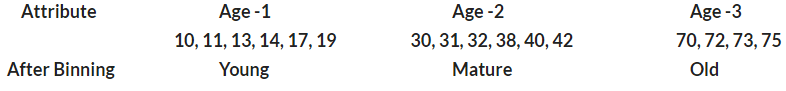

## implementation of binning using sklearn. in sklearn there is a class KBinsDiscretization. in this classyou have to provide mainly 3 paramater . 
## 1. bins---no.of bins
## 2. strategy---it has 3 value uniform, quantile,kmeans
## 3. encoding--it has 2 value ordinal,onehotencode

## For the mplemetation part we will use titanic dataset from kaggle . and we will not use all the columns for the understanding purpose of binning. here we will do analysis without binning and with binning both and judge the output.this data is not so appropriate for binning but for he understading purpose we we are using it. let's start.

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Colab Notebooks/Kaggle json'

In [ ]:
!kaggle datasets download -d hesh97/titanicdataset-traincsv

In [ ]:
!unzip titanicdataset-traincsv.zip

In [ ]:
df=pd.read_csv('/content/train.csv')
df.head()

## For understanding we will going to work on columns AGE,FARE, SURVIVED

In [ ]:
df=pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])
df.head()

In [ ]:
df.shape

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

##here we are drop all the row which have missing values for the understanding because we are not working on missing values here.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

##here we are not using any kind of binning what is happening. so first braek data into dependent and independent columns.

In [ ]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

##Now do train and test split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

##Now apply decision tree algorithm

In [ ]:
clf=DecisionTreeClassifier()

## Train the model

In [ ]:
clf.fit(X_train,y_train)

## Predict

In [ ]:
y_pred=clf.predict(X_test)

## Accuracy score without applying any transformation

In [ ]:
accuracy_score(y_test,y_pred)

## check score using cross validation

In [ ]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

##Here we did not apply Binning
##SO now we are going to apply Binning(dicretizer) and observe the result.
##here we will apply binning on our 2 columns AGE and FARE . and using strategy quantile, you can change the n-bins value accordingly your desire.

In [ ]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

##As we know the role of columntransformer so we will use it here. here index [0]means AGE and [1] means FARE in X-train you can check.

In [ ]:
X_train.head()

## Do columntransform

In [ ]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [ ]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

##if you want to check how our transformer work then see below

In [ ]:
trf.named_transformers_

In [ ]:
trf.named_transformers_['first']

##to check no.of bins in first

In [ ]:
trf.named_transformers_['first'].n_bins_

##To check range of bins

In [ ]:
trf.named_transformers_['first'].bin_edges_

In [ ]:
trf.named_transformers_['second'].bin_edges_

## Let's check how columns are transform after apply Binning

In [ ]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [ ]:
output.head()

In [ ]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [ ]:
output.sample(5)

##Now once again apply Decision tree algorithm on this.

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [ ]:
accuracy_score(y_test,y_pred2)

##Accuracy is not so iproved so you can change the value of parameter inKBinsDiscretizer().like you can change the n_bins value and observe the result or you can cahnge the strategy also.

In [ ]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

In [ ]:
discretize(5,'quantile')

In [ ]:
discretize(5,'kmeans')

In [ ]:
discretize(10,'uniform')

# Binarization: It is a special case of Binning Technique. In this technique, we convert the continuous value into binary format i.e, in either 0 or 1.

##For Example, 

##Annual Income of the Population
##If income is less than 5 lakhs, then that people include in the non-taxable region(Binary value -0), and if more than 5 lakhs, then includes in the taxable region(Binary value -1).
##Very useful Technique in Image Processing, for converting a colored image into a black and white image.
##As we know that image is the collection of pixels and its values are in the range of 0 to 255(colored images), then based on the selected threshold values you can binarize the variables and make the image into black and white, which means if less than that threshold makes that as 0 implies black portion, and if more than threshold makes as 1 means white portion.

##Implementation: Uses binarizer class of Scikit-Learn library of Python, which has two parameters: threshold and copy. If we make the copy parameter True, then it creates a new column otherwise it changes in the initial column.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/train.csv')
df.sample(3)

In [ ]:
df = pd.read_csv('/content/train.csv')[['Age','Fare','SibSp','Parch','Survived']]

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

In [ ]:
df['family'] = df['SibSp'] + df['Parch']

In [ ]:
df.head()

In [ ]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [ ]:
df.head()

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.head()

### Without binarization

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

In [ ]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

## Applying Binarization

In [ ]:
from sklearn.preprocessing import Binarizer

In [ ]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [ ]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [ ]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

In [ ]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))